In [1]:
import numpy as np
from numpy.random import RandomState
from matplotlib.pyplot import plot, hist

In [2]:
from scipy.stats import kstest
from scipy.stats.distributions import norm, lognorm

In [3]:
from longstaff_schwartz.stochastic_process import GeometricBrownianMotion

In [4]:
mu = 0.03
sigma = 0.2

In [5]:
rnd = RandomState(1234)

In [6]:
t = np.linspace(0, 20, 20)
t

array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ])

In [7]:
dt = np.concatenate((t[0:1], np.diff(t)))
dt

array([0.        , 1.05263158, 1.05263158, 1.05263158, 1.05263158,
       1.05263158, 1.05263158, 1.05263158, 1.05263158, 1.05263158,
       1.05263158, 1.05263158, 1.05263158, 1.05263158, 1.05263158,
       1.05263158, 1.05263158, 1.05263158, 1.05263158, 1.05263158])

In [8]:
gbm = GeometricBrownianMotion(mu, sigma)
X = gbm.simulate(t, 1000, rnd)
X.shape

(20, 1000)

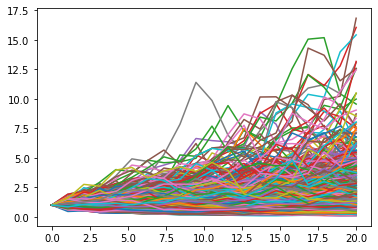

In [9]:
plot(t, X);

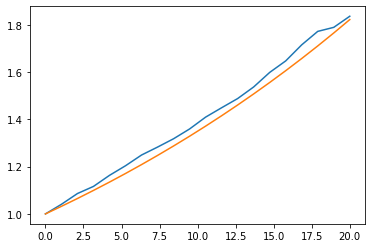

In [10]:
plot(t, np.mean(X, axis=1));
plot(t, 1 * np.exp(mu*t));

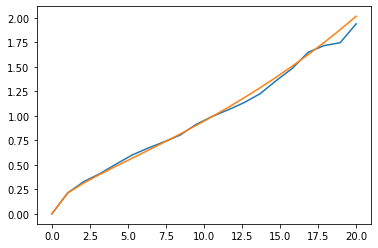

In [11]:
plot(t, np.std(X, axis=1));
plot(t, np.sqrt( 1**2 * np.exp(2*mu*t) * (np.exp(sigma**2*t)-1) ));

In [12]:
# terminal distribution (log-normal)
terminal_dist = gbm.distribution(t[-1])

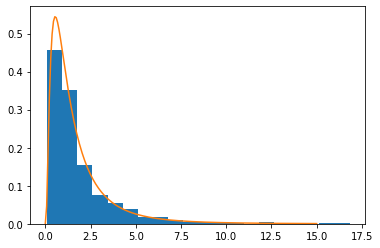

In [13]:
x = np.linspace(0, 15, 200)
hist(X[-1, :], density=True, bins=20)
plot(x, terminal_dist.pdf(x));

In [14]:
kstest(X[-1,:], terminal_dist.cdf)

KstestResult(statistic=0.023003618974225093, pvalue=0.6652056380033025)